### The Plan
1. Clean, split up, and remove punctuation from both translations
        a. Split on each word of each line in each poem
        b. Alternatively, split by line, poem, canto
        c. Maybe just split by poem and canto
2. Stem each of the translations using Snowball 
        a. try Lancaster/Lemmatizer and see if it's more effective
3. Create dtms/tfidfs for each of the poems in each of the translations
4. Use tfidfs to view each poem as a vector in a vector space
        a. Measure euclidean distance between two different translations' versions of the same poem
        b. Merits of using cosine distance?
5. Visualize the range of differences between the poems and see which ones are the most different
        a. (If time/needed, perform most common words/most distinct word analysis)
        b. Analyze most different poems from a literary perspective and propose difference in interpretation
        c. Ansatz/Pithy Solution: Hypothetical difference due to time period and British relations with Russia due to Cold War

In [73]:
%pylab inline 
#import matplotlib or from matplotlib import *
import numpy as np
import string
from datascience import *

from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball  import SnowballStemmer
from nltk.stem import WordNetLemmatizer

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [74]:
def clean_punctuation(text):
    text_cleaned = []
    punctuation = string.punctuation + '’' + '–' + '“'
    
    for i in np.arange(len(text)):
        #remove punctuation
        cleaned_poem = []
        for j in text[i]:
            text_string = j.split()
            text_tokens = []
            for word in text_string:
                if word in punctuation:
                    continue
                else:
                    new_word = "".join([char for char in word if char not in punctuation])
                    if new_word != '':
                        text_tokens.append(new_word)           
            cleaned_poem.append(text_tokens)
        text_cleaned.append(cleaned_poem)
    return text_cleaned

def stem_english_words(poem):
    stemmed_words = []
    english_stemmer = SnowballStemmer('english')
    for line in poem:
        stemmed_line = []
        for word in line:
            stemmed_line.append(english_stemmer.stem(word))
        stemmed_words.append(stemmed_line)
    return stemmed_words

In [65]:
with open('spalding.txt') as file_in:
    spalding = file_in.read()

spalding_list = spalding.split('\n'*2)
spalding_lines = [poem.replace('\u2028', ' ').replace('\n', ' ') for poem in spalding_list]

spalding_list = [poem.lower() for poem in spalding_list] #make all lowercase

spalding_list = [poem.split('\u2028') for poem in spalding_list]
spalding_cleaned = clean_punctuation(spalding_list)
spalding_cleaned = np.array(spalding_cleaned)

spalding_stemmed = []

for i in np.arange(len(spalding_cleaned)):
    spalding_stemmed.append(stem_english_words(spalding_cleaned[i]))


In [66]:
with open('johnston.txt') as file_in:
    johnston = file_in.read()    

johnston_list = johnston.split('\n'*2)
johnston_list = [poem.lower() for poem in johnston_list] #make all lowercase
johnston_lines = [poem.replace('\n', ' ') for poem in johnston_list]

johnston_list = [poem.split('\n') for poem in johnston_list]

johnston_cleaned = clean_punctuation(johnston_list)
johnston_cleaned = np.array(johnston_cleaned)

johnston_stemmed = []

for i in np.arange(len(johnston_cleaned)):
    johnston_stemmed.append(stem_english_words(johnston_cleaned[i]))

In [67]:
#cleaning original russian text
with open('pushkin.txt') as file_in:
    pushkin = file_in.read()    

pushkin_list = pushkin.split('\n'*3)
pushkin_list = [poem.lower() for poem in pushkin_list] #make all lowercase

pushkin_list = [poem.split('\n') for poem in pushkin_list]

pushkin_cleaned = clean_punctuation(pushkin_list)
pushkin_cleaned = np.array(pushkin_cleaned)

In [68]:
###Document Term Matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def create_dtm(text_list):
    cv = CountVectorizer()
    dtm = cv.fit_transform(text_list)
    # De-sparsify
    desparse = dtm.toarray()
    # Create labels for columns
    word_list = cv.get_feature_names()
    # Create a new Table
    dtm_tb = Table(word_list).with_rows(desparse)
    return dtm_tb

def create_tfidf(text_list, stop_words):
    cv = CountVectorizer(stop_words = stop_words)
    dtm = cv.fit_transform(text_list)
    tt = TfidfTransformer(norm='l1',use_idf=False)
    dtm_tf = tt.fit_transform(dtm)
#     word_list = cv.get_feature_names()
#     dtm_array = dtm_tf.toarray()
    return dtm_tf

def feature_names(text_list, stop_words):
    cv = CountVectorizer(stop_words = stop_words)
    dtm = cv.fit_transform(text_list)
    return cv.get_feature_names()

In [69]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
j_dtm_tf = create_tfidf(johnston_lines, ENGLISH_STOP_WORDS)
j_words = feature_names(johnston_lines, ENGLISH_STOP_WORDS)
johnston_table = Table(j_words).with_rows(j_dtm_tf.toarray())
johnston_table

abandon | abate | abbé      | abhor | abhorred  | abhorrent | abiding | ablaze | able | abounded | abounding | abroad | abrupt | absence | absolute | absolution | absorbed | absorption | abstracted | abstraction | absurd | absurdity | acacias | academic | academician | accept | access | accident | according | account | accounting | accounts | accused | accustomed | ace  | ache | aches | achieve | achieved | aching | acquaint | acquaintance | acquainted | acres | act      | acted | acting | action | active | actrices | acts | acute | adam     | add       | added | addict | address | addressed | adel | administrator | admiration | admire    | admires | admission | admit | admonition | admonitions | ado  | adopted | adoration | adore | adored    | adorer | adorers | adores | adorned | adorning | adornment | adorns | adrian | advantages | advent | advice | advised | advises | advocate | aeneid    | aeolian | aeons | afar | affair | affairs | affectation | affected | affection | affectionately | affright | aflame | afloat | afraid | afresh | africa | agafon | age  | aged | ageing | agent | ages | aggression | agitation | ago  | agony | agree | agreed | agricultural | ah   | ahead | aid  | ailing | ails | aim  | aimed | aiming | aims | air  | airs | akulka | alack | alarmed | alas | alban | albion | album | albums | alertly | alia | alien | alight | alike | alina | alive | allayed | allergic | allied | allow | allowed | allows | alls | alluding | allée | allées | alma | almanack | almanacs | aloft | alphabetic | altar | alter | altered | altering | altogether | amateur | amazement | ambassador | amber | ambition | amelioration | amends | amid | amidst | amorous | amply | amuse | amusing | analysed | ananas | anathematising | ancestral | anchorites | ancient | ancients | andryushka | anecdote  | anew | ange | angel | anger | angry | anguish | anguished | anisia | annalistic | annette | announces | annoyed | answer | answered | answers | anticipates | antlered | anxiety | apace | apart | apartment | apollo | appalling | apparelled | apparition | appeals | appear | appearance | appeared | appearing | appears | appetites | applause | applejack | appointment | appreciated | appreciating | apprehension | approach | approaches | approaching | approbation | appropriation | approval | apuleius | arbitrary | arch | arching | archivist | ardent | argot | argue | arise | aristocratic | arm  | armida | arms | army | arousing | arrange | arranged | arrangement | arrears | arrested | arrive | arrived | arrives | arriving | arrow | arrows | art       | artifices | artless | arts | ash  | aside | ask  | asked | asking | asks      | aspen | aspiration | aspirations | assails | assembles | assembly | asses | assessed | assignation | assume | assurance | astern | astonishment | astound | asunder | ate  | atmosphere | atour | atrocious | attack | attacked | attainable | attainments | attend | attendance | attendants | attended | attends | attention | attentions | attentive | attire | attired | attract | attraction | attractive | attribute | attune | audacious | audience | augments | aunt | aunts | aurora | author | autocrat | autograph | automatic | automedons | autumn | avert | avow | avowal | await | awaited | awaits | awake | awakening | away      | awestruck | awkwardness | azure | aÿ   | babble | bacchante | bachelors | backbiter | backdoor | backward | backwood | backwoods | bad  | badly | baffles | baker | balcony | ball | ballad | ballet | ballroom | ballrooms | balls     | balm | baltic | ban  | band | bane | banish | banished | bank | banned | banner | banquet | banquets | baptized | baratynsky | barbs | bard      | bards | barely | bargain | barin | bark | barouche | barred | barrels | baseness  | bashful  | basins | bassoons | bast | bath | bathed | batten | battle | battles | battling | bay  | bayle | beaker | beakers | beaming | bear | bearable | bearded | bearing | beast | beasts | beat | beatific | beating | beauties | beauty | beaver | 

In [70]:
s_dtm_tf = create_tfidf(spalding_lines, ENGLISH_STOP_WORDS)
s_words = feature_names(spalding_lines, ENGLISH_STOP_WORDS)
spalding_table = Table(s_words).with_rows(s_dtm_tf.toarray())
spalding_table

abandon | abandoned | abandoning | abated | abbe      | abdicate | abhorred | abide | abides | abject | abjure | abjured | abode | abound | abreast | abroad | absence | absent | absently | absorbed | absurd | absurdity | abuse | abused | abyss | acacias | academy | accelerates | accent | accents | accept | access | accompanies | accompany | accord | account | accounts | accused | accustomed | ace  | aches | aching | acknowledge | acquaintance | acquaintances | acquainted | acquiesced | acquire | acquired  | acrimonious | act  | acted | actions | actresses | acts | actual | acumen | acute | adam      | add  | addition | address | addressed | adel | adieu | adjective | adjust | admirable | admired | admirer | admit | admonish | admonition | adopt | adoration | adore | adored | adoring | adorned | adorns | adroitly | adulate | adulation | advance | advanced | advantageously | adventure | adventures | adverse | advert | advice | aeneid   | aeolus | afar | affair | affairs | affectation | affection | affectionate | affectionately | affluence | afford | affright | afield | afraid | africa | afternoon | agathon | age  | aged | ages | aggravate | agitate | agitated | agitation | ago  | agonies | agonize | agonized | agony | agree | agreed | ah   | ahem | aid  | ails | aim  | aimless | aims | air       | airy | ajar | akulka | alack | alarm | alarmed | alas | albano | albeit | albion | album | albums | alia | alight | alike | aline | alive | allay | allegiance | alleviates | alley | allotted | allowed   | allows | alloy | allude | allure | allurements | allusions | almanac | almanacs | aloof | alphabetically | altar | altered | altering | amateurs | amatory  | amaze | amazed | ambassador | amber | ambrosial | amend | amends | amiable | amiably | amicably | amid      | amidst | amity | amorous | ample | amuse | amusement | amusements | amusing | amy  | analysed | analysis | ancestral | anchorite | ancient | anciently | ancients | andriushka | anecdotes | anew | ange | angel | anger | angling | angry | anguish | anicia | animated | annette | annihilate | announcing | annoy     | annoyance | annoyed | answer | answers | antagonists | anticipate | anticipates | anticipating | anticipation | antipathies | antiquated | antiquity | anxiety | anxious | anxiously | apart | apartment | aphrodite | aping | apollo | apparently | apparition | apparitions | appeal | appear | appearance | appeared  | appears | appellation | appetite | applaud | applauds | applause | apples | applies | appointed | apportioned | appraise | apprehension | approach | approached | approaches | approaching | approval | approve | approximate | apt  | aptitude | apuleius | arches | ardent | ardently | argue | arid | aright | arise | arises | arising | aristocratic | arm  | armida | arms | army | arose | arouse | aroused | arouses | arrange | arranged | arrangement | arrant | array | arrayed | arrivals | arrive | arrived | arrives | arriving | arrow | art       | artful | artifice | artificial | artistical | artless | ascends | ascertain | ascribed | ashes | ashy | aside | ask  | asked | asks | asleep | aspect | aspens | asperities | aspirations | aspire | assailed | assails | assassinate | assemble | assemblies | assembly | assert | assigned | assistance | associate | assuage | assumed | assure | assured | assuredly | asterisk | astir | astonished | astride | asunder | ate  | athwart | atmosphere | attacked | attained  | attempt | attend | attendance | attendants | attended | attends | attentive | attic | attire | attracted | attractions | attractive | attracts | attuned | aught | aunt | aunts | aurora | austerity | author | authority | authors | autocrat | autocratic | automedons | autumn | avalanche | avenge | averred | averse | averts | avidity | avowal | await | awaited | awaiting | awaits | awake | awakens | awakes | awarded | away      | awe  | awful | awhile | awoke | ay   | aye  | babbler | babe | babes | baboon | bacchante | backdoor | backward | bad  | bade | bagga

In [71]:
#Vector Space

from sklearn.metrics import pairwise
from sklearn.manifold import MDS

def measure_distances(dtm_df):
    dist_matrix = pairwise.pairwise_distances(dtm_tf, metric='euclidean')
    return dist_matrix

def mds(dist_matrix):
    mds = MDS(n_components = 2, dissimilarity="precomputed")
    embeddings = mds.fit_transform(dist_matrix)
    _, ax = plt.subplots(figsize=(10,10))
    ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
    for i in range(13):
        ax.annotate(i+1, ((embeddings[i,0], embeddings[i,1])))

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


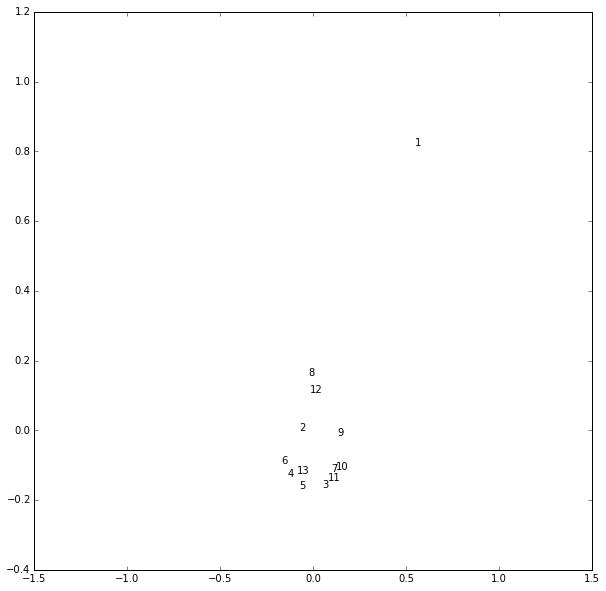

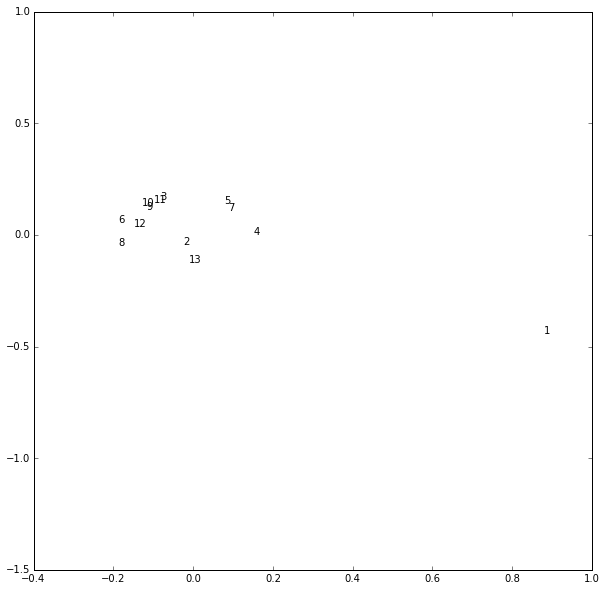

In [72]:
j_dist_matrix = measure_distances(j_dtm_tf)
s_dist_matrix = measure_distances(s_dtm_tf)

mds(j_dist_matrix)
mds(s_dist_matrix)